In [1]:
import geopandas as gpd
import os 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
poly = gpd.read_file(os.path.join('data','taxi_zones','taxi_zones.shp'))
poly['lon'] = poly['geometry'].centroid.x
poly['lat'] = poly['geometry'].centroid.y
df = pd.DataFrame(poly.drop(columns=['geometry']))

<AxesSubplot:xlabel='lon', ylabel='lat'>

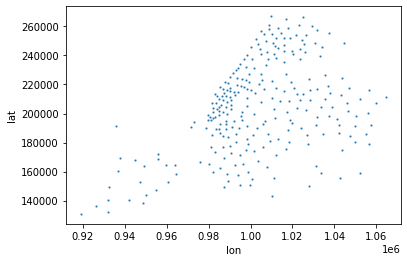

In [19]:
sns.scatterplot(x=df['lon'],y=df['lat'], s=5)

In [23]:
df = df.set_index('OBJECTID')

In [97]:
def calculate_direction(a, b):
    lat_a, lon_a = df.loc[a, ['lon','lat']]
    lat_b, lon_b = df.loc[b, ['lon','lat']]
    angle = np.arctan2(lat_a-lat_b, lon_a-lon_b)
    return np.rad2deg(angle)

calculate_direction(261, 260)

-113.4041931314074

In [98]:
angle_matrix = pd.DataFrame(index=df.index,columns=df.index)

In [99]:
for i in angle_matrix.index:
    for j in angle_matrix.columns:
        angle_matrix.loc[i,j] = calculate_direction(i, j)

In [100]:
angle_matrix.iloc[0:6,0:6]

OBJECTID,1,2,3,4,5,6
OBJECTID,,,,,,
1,0.0,-73.948961,-124.808675,-101.969441,4.65232,-40.316441
2,106.051039,0.0,177.06112,133.90989,76.763392,84.847974
3,55.191325,-2.93888,0.0,34.920492,39.784073,32.839229
4,78.030559,-46.09011,-145.079508,0.0,43.336225,30.339168
5,-175.34768,-103.236608,-140.215927,-136.663775,0.0,-118.088692
6,139.683559,-95.152026,-147.160771,-149.660832,61.911308,0.0


In [101]:
angle_matrix.to_csv('data/angle_matrix.csv')

<AxesSubplot:xlabel='lon', ylabel='lat'>

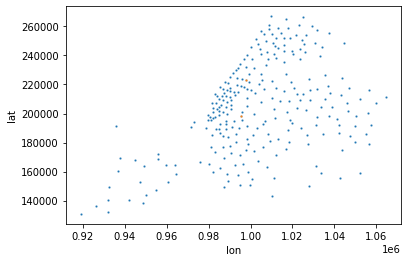

In [47]:
sns.scatterplot(x=df['lon'],y=df['lat'], s=5)
sns.scatterplot(x=df.loc[[256,263]]['lon'],y=df.loc[[256,263]]['lat'], s=5)

In [59]:
lon_a, lat_a = [-1,-1]
lon_b, lat_b = [0,0]
np.rad2deg(np.arctan2(lat_a-lat_b, lon_a-lon_b))

-135.0

In [96]:
df.to_csv('data/location_df.csv')

In [71]:
def angle_diff(a1, a2):
    d_a = a1-a2
    if d_a>180:
        d_a -= 360
    elif d_a<-180:
        d_a += 360
    return abs(d_a)

def calculate_overlap(a1, a2, b1, b2):
    x_sorted, points_sorted_x = zip(*sorted(zip([a1[0],a2[0],b1[0],b2[0]], ['a','a','b','b'])))
    y_sorted, points_sorted_y = zip(*sorted(zip([a1[1],a2[1],b1[1],b2[1]], ['a','a','b','b'])))
    
    if points_sorted_x[0] != points_sorted_x[1]:
        # overlap! 
        overlap_x = x_sorted[2]-x_sorted[1]
    else:
        overlap_x = 0
        
    if points_sorted_y[0] != points_sorted_y[1]:
        # overlap! 
        overlap_y = y_sorted[2]-y_sorted[1]
    else:
        overlap_y = 0
    
    return overlap_x, overlap_y

def length_manhattan

def match_rides(pu_a, do_a, pu_b, do_b):
    lat_a1, lon_a1 = df.loc[pu_a, ['lon','lat']]
    lat_a2, lon_a2 = df.loc[do_a, ['lon','lat']]
    lat_b1, lon_b1 = df.loc[pu_b, ['lon','lat']]
    lat_b2, lon_b2 = df.loc[do_b, ['lon','lat']]
    
    angle_a = calculate_direction(lat_a1, lon_a1, lat_a2, lon_a2)
    angle_b = calculate_direction(lat_b1, lon_b1, lat_b2, lon_b2)
    if angle_diff(angle_a, angle_b)<=45:
        overlap_x, overlap_y = calculate_overlap(a1, a2, b1, b2)
        
    

20

(2, 0)

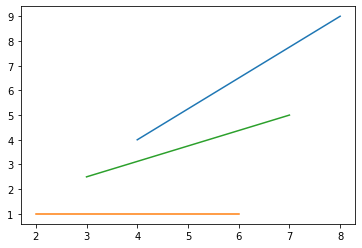

In [73]:


a1 = [4,4]
a2 = [8,9]
b1 = [2,1]
b2 = [6,1]
plt.plot([a1[0],a2[0]], [a1[1],a2[1]])
plt.plot([b1[0],b2[0]], [b1[1],b2[1]])
plt.plot([(b1[0]+a1[0])/2,(b2[0]+a2[0])/2], [(b1[1]+a1[1])/2,(b2[1]+a2[1])/2])
calculate_overlap(a1, a2, b1, b2)

In [2]:
import fiona
import shapely

In [27]:
point =  # longitude, latitude

for boro in shape_dict:
    print(boro)
    %timeit shape_dict[boro]['shape_simp'].contains(point)
    %timeit shape_dict[boro]['shape'].contains(point)

Bronx
8.68 µs ± 489 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.75 µs ± 787 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
77.8 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Manhattan
8.82 µs ± 675 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
9.25 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
52.8 ms ± 3.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Staten Island
9.15 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.87 µs ± 982 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
79 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Brooklyn
8.79 µs ± 713 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.7 µs ± 631 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
220 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Queens
9.78 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.4 µs 

In [183]:
shape_dict = {}
with fiona.open("data/Borough Boundaries/geo_export_86f96b0c-2916-4b73-b089-ba632d5abdd7.shp") as fiona_collection:
    # In this case, we'll assume the shapefile only has one record/layer (e.g., the shapefile
    # is just for the borders of a single country, etc.).
    #shapefile_record = fiona_collection.next()
    for record in fiona_collection:  
        name = record['properties']['boro_name']
        shape = shapely.geometry.asShape(record['geometry'])
        shape_dict[name] = {'shape':shape}

for boro in shape_dict:
    x0, y0, x1, y1 = shape_dict[boro]['shape'].bounds
    shape_dict[boro]['x0'] = x0
    shape_dict[boro]['y0'] = y0
    shape_dict[boro]['x1'] = x1
    shape_dict[boro]['y1'] = y1
    shape_dict[boro]['bounds'] = shapely.geometry.box(minx, miny, maxx, maxy)
    tol = min(x1-x0, y1-y0)/2000
    shape_dict[boro]['shape_simp'] = shape_dict[boro]['shape'].simplify(tol)

boro_names = list(shape_dict.keys())

def get_potential_boros(df, shape_dict):
    potential_boros = pd.DataFrame(index=df.index)
    for boro in shape_dict:
        in_boro = df['pickup_longitude'].between(shape_dict[boro]['x0'], shape_dict[boro]['x1'])
        in_boro = in_boro & df['pickup_latitude'].between(shape_dict[boro]['y0'], shape_dict[boro]['y1'])
        potential_boros[boro] = in_boro
    return potential_boros

def get_clear_boros(df, shape_dict):
    potential_boros = get_potential_boros(df, shape_dict)
    clear_boros = potential_boros[potential_boros.sum(axis=1)==1]
    clear_boros = clear_boros.stack().reset_index()
    clear_boros = clear_boros[clear_boros[0]==True]
    #clear_boros['level_0'] = clear_boros['level_0'].astype(int)
    #clear_boros = clear_boros.set_index('level_0')
    #print(clear_boros)
    #merged_df = clear_boros.merge(df, left_index=True, right_on="ride_id_0",how="left")
    return clear_boros

In [162]:
merged_df = pd.read_csv('data/merged_df.csv',index_col=0)

C:\Util\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [179]:
merged_df.index = merged_df['ride_id_0']

In [186]:
clear_boros = get_clear_boros(merged_df, shape_dict)

In [184]:
potential_boros = get_potential_boros(merged_df, shape_dict)

In [188]:
merged_df

,ride_id_0,ride_id_1,ride_id_2,ride_id_3,ride_id_4,ride_id_5,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_minutes,direction,euclidean_length,time-of-day,day-of-week
ride_id_0,,,,,,,,,,,,,,,,,,,,,
3021109,3021109,3022704.0,3020821.0,3024802.0,3022388.0,NaN,1,2016-06-06 18:30:50,2016-06-06 18:49:39,1,...,0.5,3.25,0.00,0.3,19.55,1.881667e+01,-108.178396,0.032868,4,Mon
3021110,3021110,3020931.0,3021851.0,3021617.0,NaN,NaN,1,2016-06-06 18:30:50,2016-06-06 18:44:55,3,...,0.5,5.00,0.00,0.3,16.80,1.408333e+01,-102.889493,0.019324,4,Mon
3021111,3021111,3021865.0,3021566.0,3021070.0,3022173.0,NaN,2,2016-06-06 18:30:50,2016-06-06 18:51:42,1,...,0.5,3.26,0.00,0.3,19.56,2.086667e+01,55.737757,0.041319,4,Mon
3021113,3021113,3020241.0,3020932.0,3022691.0,NaN,NaN,2,2016-06-06 18:30:50,2016-06-06 19:14:33,1,...,0.5,0.00,5.54,0.3,62.84,4.371667e+01,151.942713,0.220770,4,Mon
3021392,3021392,3020456.0,3020677.0,3023414.0,NaN,NaN,2,2016-06-06 18:30:51,2016-06-06 18:40:19,1,...,0.5,1.00,0.00,0.3,10.30,9.466667e+00,-7.501957,0.014960,4,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564307,4564307,NaN,NaN,NaN,NaN,NaN,2,2016-06-12 23:58:21,2016-06-12 23:59:36,1,...,0.5,0.00,0.00,0.3,4.30,1.250000e+00,93.136358,0.000279,5,Sun
4564463,4564463,NaN,NaN,NaN,NaN,NaN,1,2016-06-12 23:58:38,2016-06-12 23:58:56,1,...,0.5,6.75,0.00,0.3,10.55,3.000000e-01,0.000000,0.000000,5,Sun
4564912,4564912,NaN,NaN,NaN,NaN,NaN,2,2016-06-12 23:59:15,2016-06-12 23:59:31,1,...,0.5,0.00,0.00,0.3,12.00,2.666667e-01,0.000000,0.000000,5,Sun


43863

In [194]:
merged_df_boros.to_csv('data/merged_df_boros.csv')

In [149]:
merged_df_boros.shape

(23944723, 32)

In [110]:
clear_boros = potential_boros[potential_boros.sum(axis=1)==1]

,level_1,0
level_0,,
2765158,Manhattan,True
2765159,Manhattan,True
2128993,Manhattan,True
2128995,Manhattan,True
2128994,Manhattan,True
...,...,...
2776142,Manhattan,True
2776140,Queens,True
2776141,Manhattan,True


In [113]:
clear_boros['level_1'].value_counts()

Manhattan        4181
Queens           2412
Brooklyn           43
Bronx               9
Staten Island       2
Name: level_1, dtype: int64

In [92]:
df_sample['pickup_latitude'].round(5)

2128992    40.78510
2765158    40.75064
2765157    40.74150
2765159    40.74221
2128993    40.75631
             ...   
2776141    40.74172
2776144    40.78434
2776143    40.75230
2776145    40.73420
2776146    40.64541
Name: pickup_latitude, Length: 10000, dtype: float64

In [117]:
import pickle
with open('data/results.pkl', 'rb') as f:
    results = pickle.load(f)

In [115]:
df_sample['tpep_pickup_datetime'].dt.strftime("%H")

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
round(, 5)

In [90]:
get_boros(df_sample, shape_dict).sum(axis=1)

2128992    2
2765158    1
2765157    2
2765159    1
2128993    1
          ..
2776141    1
2776144    2
2776143    1
2776145    2
2776146    1
Length: 10000, dtype: int64

In [76]:
def check_boro(lon, lat):
    p = shapely.geometry.Point(lon, lat)
    for boro in boro_names[:-1]:
        if shape_dict[boro]['shape_simp'].contains(p):
            return boro
    return boro_names[-1]

In [54]:
df_sample = pd.read_csv('data/df_sample.csv', index_col=0)

In [77]:
lats = df_sample['pickup_latitude']
lons = df_sample['pickup_longitude']
import time 
boros = []
t0 = time.time()
for lat, lon in zip(lats, lons):
    boros.append(check_boro(lon,lat))
print(time.time()-t0)

26.09984254837036


In [78]:
boro_names

['Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Queens']

In [71]:
%timeit df_sample[['pickup_longitude','pickup_latitude']].iloc[0,:]

1.51 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [62]:
%timeit check_boro(df_sample[['pickup_longitude','pickup_latitude']].iloc[0,:])

5.2 ms ± 280 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit p = shapely.geometry.Point(55, 48)

21.8 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [68]:
%timeit shape_dict[boro]['shape_simp'].contains(p)

9.59 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [69]:
ps = [shapely.geometry.Point(45, 45),shapely.geometry.Point(10, 30)]

In [70]:
shape_dict[boro]['shape_simp'].contains(ps)

AttributeError: 'list' object has no attribute '_geom'

In [60]:
boros = df_sample[['pickup_longitude','pickup_latitude']].apply(check_boro, axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\volpir\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-60-2ff6e2431b38>", line 1, in <module>
    boros = df_sample[['pickup_longitude','pickup_latitude']].apply(check_boro, axis=1)
  File "C:\Util\Anaconda3\lib\site-packages\pandas\core\frame.py", line 8740, in apply
    return op.apply()
  File "C:\Util\Anaconda3\lib\site-packages\pandas\core\apply.py", line 688, in apply
    return self.apply_standard()
  File "C:\Util\Anaconda3\lib\site-packages\pandas\core\apply.py", line 812, in apply_standard
    results, res_index = self.apply_series_generator()
  File "C:\Util\Anaconda3\lib\site-packages\pandas\core\apply.py", line 828, in apply_series_generator
    results[i] = self.f(v)
  File "<ipython-input-59-018a40ed1402>", line 5, in check_boro
    if shape_dict[boro]['shape_simp'].contains(p):
  File "C:

TypeError: object of type 'NoneType' has no len()

In [11]:
min_x = 100
min_y = 100
max_x = -100
max_y = -100
for shape in shapes:
    minx, miny, maxx, maxy = shape.bounds
    print(minx, miny, maxx, maxy)
    min_x = min(min_x, minx)
    min_y = min(min_y, miny)
    max_y = max(max_y, maxy)
    max_x = max(max_x, maxx)

-73.93360592036706 40.78535662050845 -73.76533243995276 40.91553277600008
-74.04772962763064 40.68291694544512 -73.90665099539478 40.87903804730722
-74.25559136315213 40.49611539518921 -74.04923629842045 40.64892555177345
-74.0418964317642 40.56952999448672 -73.83355923946294 40.73912795313436
-73.96262015898652 40.5418339604531 -73.70000906387347 40.80101146781899


(-74.25559136315213, -73.70000906387347, 40.49611539518921, 40.91553277600008)

In [109]:

# Alternative: if point.within(shape)
%timeit shapes[1].contains(point)

24.3 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:

bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)

%timeit bounding_box.contains(point)

3.46 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [111]:
minx, miny, maxx, maxy

(-74.04772962763064, 40.68291694544512, -73.90665099539478, 40.87903804730722)

In [122]:
shape_1 = shapes[1]
 = shape_1.simplify((maxx-minx)/5000)

In [87]:
(maxx-minx)/5000

5.2522219022611696e-05

In [123]:
%timeit shape_1.contains(point)

24.7 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [124]:
%timeit shape_1_simple.contains(point)

3.52 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


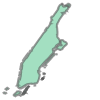

In [125]:
shape_1_simple